# POSTTEST 6: Unsupervised Learning
### NIM: 2009106072
### Nama: Gilang Raditya

### Import Module

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Baca csv lalu lihat isinya

In [30]:
dataset = pd.read_csv("Weather Test Data (Cleaned).csv")
dataset.head(20)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,0.5275,0.588803,0.000000,0.03786,0.534813,WSW,0.339130,W,...,0.313253,0.373737,0.292929,0.436426,0.511327,0.625,0.250,0.605150,0.562992,No
1,Row1,Albury,0.4350,0.633205,0.000000,0.03786,0.534813,NE,0.147826,SE,...,0.108434,0.444444,0.151515,0.608247,0.577670,0.625,0.625,0.542918,0.627953,No
2,Row2,Albury,0.5625,0.575290,0.000000,0.03786,0.534813,W,0.373913,SW,...,0.289157,0.484848,0.181818,0.470790,0.503236,0.125,0.625,0.542918,0.590551,No
3,Row3,Albury,0.4475,0.708494,0.000000,0.03786,0.534813,NNW,0.634783,SE,...,0.337349,0.414141,0.080808,0.458763,0.428803,0.625,0.625,0.547210,0.700787,No
4,Row4,Albury,0.6025,0.451737,0.056034,0.03786,0.534813,W,0.469565,NNW,...,0.337349,0.757576,0.929293,0.207904,0.257282,1.000,1.000,0.527897,0.417323,Yes
5,Row6,Albury,0.4925,0.658301,0.000000,0.03786,0.534813,S,0.147826,SE,...,0.108434,0.555556,0.272727,0.637457,0.610032,0.625,0.625,0.564378,0.643701,No
6,Row7,Albury,0.6100,0.747104,0.000000,0.03786,0.534813,WSW,0.243478,SE,...,0.156627,0.444444,0.181818,0.493127,0.493528,0.625,0.125,0.652361,0.755906,No
7,Row8,Albury,0.5050,0.563707,0.002874,0.03786,0.534813,W,0.278261,WNW,...,0.204819,0.474747,0.272727,0.410653,0.453074,0.125,0.625,0.517167,0.553150,No
8,Row9,Albury,0.4875,0.604247,0.000000,0.03786,0.534813,WNW,0.426087,W,...,0.373494,0.454545,0.252525,0.383162,0.422330,0.625,0.625,0.577253,0.612205,No
9,Row10,Albury,0.5275,0.783784,0.000000,0.03786,0.534813,WNW,0.295652,ENE,...,0.313253,0.404040,0.080808,0.522337,0.519417,0.625,0.625,0.635193,0.783465,No


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42677 entries, 0 to 42676
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         42677 non-null  object 
 1   Location       42677 non-null  object 
 2   MinTemp        42677 non-null  float64
 3   MaxTemp        42677 non-null  float64
 4   Rainfall       42677 non-null  float64
 5   Evaporation    42677 non-null  float64
 6   Sunshine       42677 non-null  float64
 7   WindGustDir    42677 non-null  object 
 8   WindGustSpeed  42677 non-null  float64
 9   WindDir9am     42677 non-null  object 
 10  WindDir3pm     42677 non-null  object 
 11  WindSpeed9am   42677 non-null  float64
 12  WindSpeed3pm   42677 non-null  float64
 13  Humidity9am    42677 non-null  float64
 14  Humidity3pm    42677 non-null  float64
 15  Pressure9am    42677 non-null  float64
 16  Pressure3pm    42677 non-null  float64
 17  Cloud9am       42677 non-null  float64
 18  Cloud3

### Lakukan Encoding Terlebih Dahulu

In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
# Melakukan Encoding kepada Kolom Bertipe data object
encoder = OrdinalEncoder()
object_cols = dataset.select_dtypes(include='object').columns
dataset[object_cols] = encoder.fit_transform(dataset[object_cols])
# Tampilkan info dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42677 entries, 0 to 42676
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         42677 non-null  float64
 1   Location       42677 non-null  float64
 2   MinTemp        42677 non-null  float64
 3   MaxTemp        42677 non-null  float64
 4   Rainfall       42677 non-null  float64
 5   Evaporation    42677 non-null  float64
 6   Sunshine       42677 non-null  float64
 7   WindGustDir    42677 non-null  float64
 8   WindGustSpeed  42677 non-null  float64
 9   WindDir9am     42677 non-null  float64
 10  WindDir3pm     42677 non-null  float64
 11  WindSpeed9am   42677 non-null  float64
 12  WindSpeed3pm   42677 non-null  float64
 13  Humidity9am    42677 non-null  float64
 14  Humidity3pm    42677 non-null  float64
 15  Pressure9am    42677 non-null  float64
 16  Pressure3pm    42677 non-null  float64
 17  Cloud9am       42677 non-null  float64
 18  Cloud3

Kolom yang digunakan untuk clustering adalah curah hujan dan sinar matahari

In [34]:
point = dataset[['Rainfall', 'Sunshine']]

Kita gunakan algoritma kmeans untuk clustering dengan jumlah cluster 2

In [35]:
model = KMeans(n_clusters=2)

Modelling kmeans dengan data

In [8]:
model.fit(point)

KMeans(n_clusters=2)

Menampilkan hasil pelabelan dari model yang dihasilkan

In [9]:
label = model.labels_
label

array([0, 0, 0, ..., 0, 0, 0])

Membuat dataset label asli dan label cluster

In [10]:
ds_kmeans = pd.DataFrame({'cluster': label, 'species': dataset['RainToday']})

Evaluasi hasil penglabelan dari model yang dihasilkan

In [11]:
crosstab = pd.crosstab(ds_kmeans['cluster'], ds_kmeans['species'])
crosstab

species,0.0,1.0
cluster,,
0,29464,6879
1,3814,2520


Menentukan x dan y

In [12]:
x = point['Rainfall']
y = point['Sunshine']

Menampilkan Nilai centroid dari cluster

In [13]:
centroid = model.cluster_centers_
centroid

array([[0.00670715, 0.59660837],
       [0.01821729, 0.18024823]])

Memisahkan centroid x dan y

In [14]:
centroid_x = centroid[:, 0]
centroid_y = centroid[:, 1]

Menampilkan persebaran cluster dan letak centroidnya

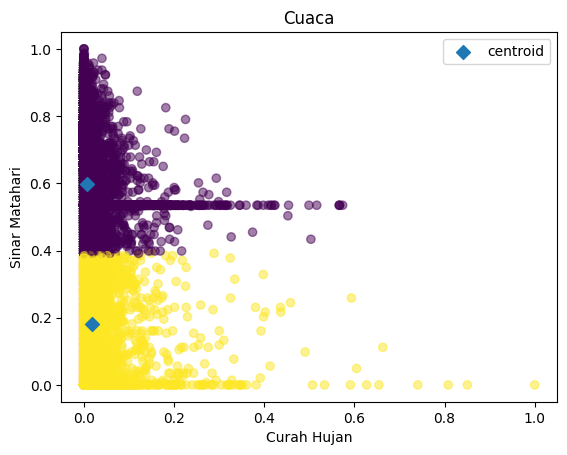

In [18]:
plt.Figure(figsize=(5, 5), dpi=120)
plt.scatter(x, y, alpha=0.5, c=label)
plt.scatter(centroid_x, centroid_y, marker='D', s=50, label='centroid')
plt.title('Cuaca')
plt.xlabel('Curah Hujan')
plt.ylabel('Sinar Matahari')
plt.legend()
plt.show()

Menghitung cluster dan inertianya

In [19]:
cluster_range = range(1, 10)
sse = []

for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(point)
    sse.append(model.inertia_)

Visualisasi elbow method untuk menentukan jumlah cluster yang optimal

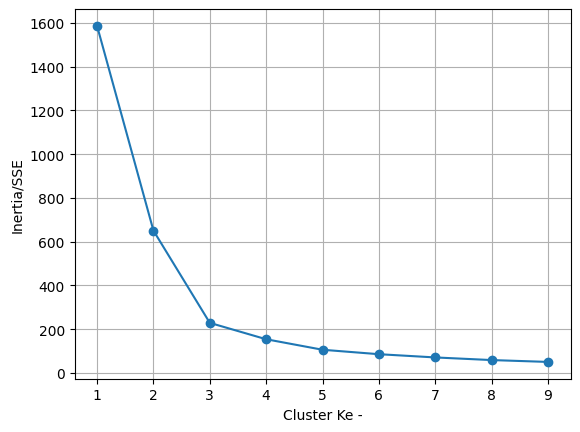

In [21]:
plt.Figure(figsize=(5, 5))
plt.plot(cluster_range, sse, '-o')
plt.xlabel('Cluster Ke -')
plt.ylabel('Inertia/SSE')
plt.grid()
plt.show()